# 14장 모델의 성능 향상시키기

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch14-colab.ipynb)

## 데이터의 확인과 검증셋

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [4]:
#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 2s 31ms/step - loss: 2.9661 - accuracy: 0.4855 - val_loss: 0.3725 - val_accuracy: 0.8492
Epoch 2/50
8/8 [==============================] -

In [5]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 4ms/step - loss: 0.1686 - accuracy: 0.9385
Test accuracy: 0.9384615421295166


## 2. 모델 업데이트하기

### 기본 코드 불러오기

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


### 모델의 저장 설정 및 실행

In [7]:
# 모델 저장의 조건을 설정합니다.
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다. 
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all\01-0.2377.hdf5

Epoch 2: saving model to ./data/model/all\02-0.8308.hdf5

Epoch 3: saving model to ./data/model/all\03-0.8292.hdf5

Epoch 4: saving model to ./data/model/all\04-0.8477.hdf5

Epoch 5: saving model to ./data/model/all\05-0.8823.hdf5

Epoch 6: saving model to ./data/model/all\06-0.9031.hdf5

Epoch 7: saving model to ./data/model/all\07-0.9038.hdf5

Epoch 8: saving model to ./data/model/all\08-0.9108.hdf5

Epoch 9: saving model to ./data/model/all\09-0.9200.hdf5

Epoch 10: saving model to ./data/model/all\10-0.9192.hdf5

Epoch 11: saving model to ./data/model/all\11-0.9200.hdf5

Epoch 12: saving model to ./data/model/all\12-0.9192.hdf5

Epoch 13: saving model to ./data/model/all\13-0.9208.hdf5

Epoch 14: saving model to ./data/model/all\14-0.9208.hdf5

Epoch 15: saving model to ./data/model/all\15-0.9215.hdf5

Epoch 16: saving model to ./data/model/all\16-0.9200.hdf5

Epoch 17: saving model to ./data/model/all\17-0.9215.hdf5

Epoch

In [8]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 5ms/step - loss: 0.1925 - accuracy: 0.9362
Test accuracy: 0.9361538290977478


## 3. 그래프로 과적합 확인하기

In [9]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴수 있습니다)
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [10]:
# history에 저장된 학습 결과를 확인해 보겠습니다. 
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.189184,0.937644,0.208974,0.930000
1,0.187946,0.937644,0.209243,0.926923
2,0.187518,0.937388,0.208360,0.928462
3,0.186824,0.937644,0.207440,0.930000
4,0.186251,0.937644,0.207259,0.928462
...,...,...,...,...
1995,0.019946,0.994098,0.144977,0.980000
1996,0.020857,0.993841,0.143104,0.983077
1997,0.020986,0.994355,0.144777,0.980769
1998,0.021375,0.993585,0.146978,0.980000


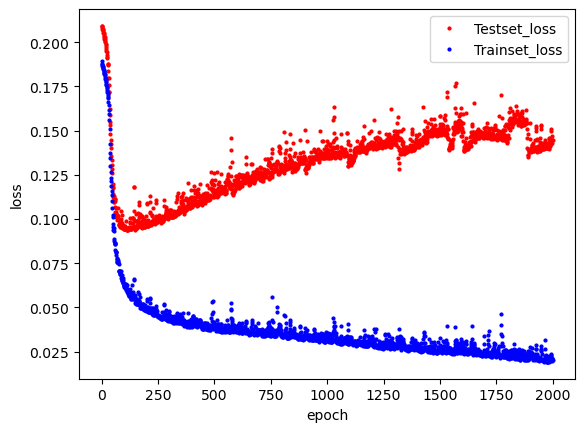

In [11]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 4. 학습의 자동 중단

### 기본 코드 불러오기

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                390       
                                                                 
 dense_13 (Dense)            (None, 12)                372       
                                                                 
 dense_14 (Dense)            (None, 8)                 104       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


### 학습의 자동 중단 및 최적화 모델 저장

In [13]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])


Epoch 1/2000
8/8 [==============================] - 1s 37ms/step - loss: 1.0284 - accuracy: 0.7496 - val_loss: 0.6208 - val_accuracy: 0.7746
Epoch 2/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.5379 - accuracy: 0.7501 - val_loss: 0.4496 - val_accuracy: 0.7800
Epoch 3/2000
8/8 [==============================] - 0s 23ms/step - loss: 0.4037 - accuracy: 0.7729 - val_loss: 0.3385 - val_accuracy: 0.8023
Epoch 4/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.3499 - accuracy: 0.8006 - val_loss: 0.3074 - val_accuracy: 0.8500
Epoch 5/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.3168 - accuracy: 0.8791 - val_loss: 0.2954 - val_accuracy: 0.8992
Epoch 6/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.2962 - accuracy: 0.8945 - val_loss: 0.2768 - val_accuracy: 0.9038
Epoch 7/2000
8/8 [==============================] - 0s 21ms/step - loss: 0.2786 - accuracy: 0.9063 - val_loss: 0.2672 - val_accuracy: 0.9192
Epoch 8/2000


Epoch 59/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.1201 - accuracy: 0.9574 - val_loss: 0.1424 - val_accuracy: 0.9431
Epoch 60/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.1192 - accuracy: 0.9566 - val_loss: 0.1420 - val_accuracy: 0.9423
Epoch 61/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1208 - accuracy: 0.9530 - val_loss: 0.1422 - val_accuracy: 0.9423
Epoch 62/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.1190 - accuracy: 0.9566 - val_loss: 0.1520 - val_accuracy: 0.9423
Epoch 63/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.1175 - accuracy: 0.9582 - val_loss: 0.1390 - val_accuracy: 0.9454
Epoch 64/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1141 - accuracy: 0.9597 - val_loss: 0.1364 - val_accuracy: 0.9469
Epoch 65/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.1122 - accuracy: 0.9618 - val_loss: 0.1359 - val_accuracy: 0.9462
Epoch 6

8/8 [==============================] - 0s 17ms/step - loss: 0.0762 - accuracy: 0.9774 - val_loss: 0.1017 - val_accuracy: 0.9662
Epoch 117/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0754 - accuracy: 0.9769 - val_loss: 0.1007 - val_accuracy: 0.9692
Epoch 118/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.0748 - accuracy: 0.9764 - val_loss: 0.1000 - val_accuracy: 0.9677
Epoch 119/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0750 - accuracy: 0.9769 - val_loss: 0.1008 - val_accuracy: 0.9654
Epoch 120/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0758 - accuracy: 0.9754 - val_loss: 0.1001 - val_accuracy: 0.9654
Epoch 121/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.0740 - accuracy: 0.9764 - val_loss: 0.0981 - val_accuracy: 0.9708
Epoch 122/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0732 - accuracy: 0.9784 - val_loss: 0.0982 - val_accuracy: 0.9700
Epoch 123/2000

8/8 [==============================] - 0s 15ms/step - loss: 0.0517 - accuracy: 0.9854 - val_loss: 0.0748 - val_accuracy: 0.9823
Epoch 174/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.0521 - accuracy: 0.9851 - val_loss: 0.0746 - val_accuracy: 0.9792
Epoch 175/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0541 - accuracy: 0.9841 - val_loss: 0.0761 - val_accuracy: 0.9800
Epoch 176/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0517 - accuracy: 0.9859 - val_loss: 0.0773 - val_accuracy: 0.9777
Epoch 177/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0529 - accuracy: 0.9843 - val_loss: 0.0877 - val_accuracy: 0.9754
Epoch 178/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0562 - accuracy: 0.9831 - val_loss: 0.0751 - val_accuracy: 0.9800
Epoch 179/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0544 - accuracy: 0.9846 - val_loss: 0.0744 - val_accuracy: 0.9823
Epoch 180/2000

8/8 [==============================] - 0s 10ms/step - loss: 0.0434 - accuracy: 0.9900 - val_loss: 0.0698 - val_accuracy: 0.9808
Epoch 231/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0433 - accuracy: 0.9887 - val_loss: 0.0691 - val_accuracy: 0.9831
Epoch 232/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0427 - accuracy: 0.9900 - val_loss: 0.0679 - val_accuracy: 0.9815
Epoch 233/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0436 - accuracy: 0.9882 - val_loss: 0.0749 - val_accuracy: 0.9777
Epoch 234/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0471 - accuracy: 0.9869 - val_loss: 0.0687 - val_accuracy: 0.9815
Epoch 235/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0445 - accuracy: 0.9885 - val_loss: 0.0729 - val_accuracy: 0.9800
Epoch 236/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0450 - accuracy: 0.9887 - val_loss: 0.0712 - val_accuracy: 0.9792
Epoch 237/2000
8/8 

8/8 [==============================] - 0s 10ms/step - loss: 0.0376 - accuracy: 0.9910 - val_loss: 0.0669 - val_accuracy: 0.9823
Epoch 288/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.0384 - accuracy: 0.9908 - val_loss: 0.0655 - val_accuracy: 0.9815
Epoch 289/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0375 - accuracy: 0.9910 - val_loss: 0.0653 - val_accuracy: 0.9815
Epoch 290/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0399 - accuracy: 0.9905 - val_loss: 0.0659 - val_accuracy: 0.9815
Epoch 291/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0406 - accuracy: 0.9910 - val_loss: 0.0673 - val_accuracy: 0.9831
Epoch 292/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0367 - accuracy: 0.9920 - val_loss: 0.0647 - val_accuracy: 0.9815
Epoch 293/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0380 - accuracy: 0.9905 - val_loss: 0.0651 - val_accuracy: 0.9808
Epoch 294/2000


8/8 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.9915 - val_loss: 0.0609 - val_accuracy: 0.9854
Epoch 345/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0337 - accuracy: 0.9920 - val_loss: 0.0614 - val_accuracy: 0.9831
Epoch 346/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0371 - accuracy: 0.9913 - val_loss: 0.0673 - val_accuracy: 0.9808
Epoch 347/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0385 - accuracy: 0.9900 - val_loss: 0.0742 - val_accuracy: 0.9792
Epoch 348/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0383 - accuracy: 0.9897 - val_loss: 0.0674 - val_accuracy: 0.9823
Epoch 349/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0389 - accuracy: 0.9905 - val_loss: 0.0700 - val_accuracy: 0.9808
Epoch 350/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0383 - accuracy: 0.9900 - val_loss: 0.0618 - val_accuracy: 0.9808
Epoch 351/2000

In [14]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 6ms/step - loss: 0.0489 - accuracy: 0.9815
Test accuracy: 0.9815384745597839
